In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error


df = pd.read_csv('Hitters.csv')
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


In [45]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
47,205.0,57.0,8.0,34.0,32.0,9.0,5.0,756.0,192.0,32.0,117.0,107.0,51.0,58.0,4.0,4.0,0,0,0
113,574.0,152.0,31.0,91.0,101.0,64.0,3.0,985.0,260.0,53.0,148.0,173.0,95.0,1253.0,111.0,11.0,1,1,1
244,466.0,108.0,33.0,75.0,86.0,72.0,3.0,652.0,142.0,44.0,102.0,109.0,102.0,286.0,8.0,8.0,0,0,0
40,181.0,41.0,1.0,15.0,21.0,33.0,2.0,232.0,50.0,4.0,20.0,29.0,45.0,326.0,29.0,5.0,0,0,0
21,426.0,109.0,3.0,55.0,43.0,62.0,1.0,426.0,109.0,3.0,55.0,43.0,62.0,361.0,22.0,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,243.0,53.0,4.0,18.0,26.0,27.0,4.0,853.0,228.0,23.0,101.0,110.0,76.0,107.0,3.0,3.0,1,0,1
255,246.0,76.0,5.0,35.0,39.0,13.0,6.0,912.0,234.0,12.0,102.0,96.0,80.0,44.0,0.0,1.0,0,0,0
72,512.0,131.0,26.0,69.0,96.0,52.0,14.0,5347.0,1397.0,221.0,712.0,815.0,548.0,119.0,216.0,12.0,0,1,0
235,551.0,160.0,23.0,86.0,90.0,87.0,5.0,2235.0,602.0,75.0,278.0,328.0,273.0,1224.0,115.0,11.0,0,1,0


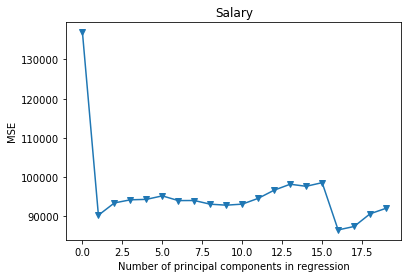

In [42]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)
y_train = y_train.fillna(y_train.mean())
# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [12]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [13]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [14]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.215399,-0.367806,0.058383,0.027728,0.017248,-0.103710
1,0.210356,-0.363804,0.048768,0.011653,-0.013760,-0.115771
2,0.209753,-0.232320,-0.190024,-0.266772,0.056637,-0.074143
3,0.208525,-0.366283,-0.026125,-0.052286,-0.029717,-0.174071
4,0.244688,-0.303961,-0.074444,-0.147522,0.001853,-0.053992


In [15]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

/home/dreuter/.julia/conda/3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [36]:
y_train = y_train.fillna(y_train.mean())

(-1, 19.9)

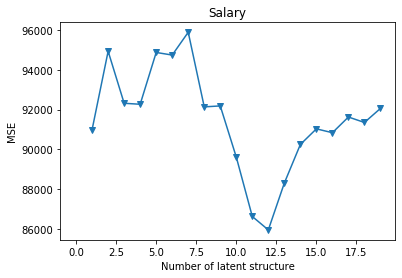

In [39]:
n = len(X_train)

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of latent structure')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

In [38]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
47,205.0,57.0,8.0,34.0,32.0,9.0,5.0,756.0,192.0,32.0,117.0,107.0,51.0,58.0,4.0,4.0,0,0,0
113,574.0,152.0,31.0,91.0,101.0,64.0,3.0,985.0,260.0,53.0,148.0,173.0,95.0,1253.0,111.0,11.0,1,1,1
244,466.0,108.0,33.0,75.0,86.0,72.0,3.0,652.0,142.0,44.0,102.0,109.0,102.0,286.0,8.0,8.0,0,0,0
40,181.0,41.0,1.0,15.0,21.0,33.0,2.0,232.0,50.0,4.0,20.0,29.0,45.0,326.0,29.0,5.0,0,0,0
21,426.0,109.0,3.0,55.0,43.0,62.0,1.0,426.0,109.0,3.0,55.0,43.0,62.0,361.0,22.0,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,243.0,53.0,4.0,18.0,26.0,27.0,4.0,853.0,228.0,23.0,101.0,110.0,76.0,107.0,3.0,3.0,1,0,1
255,246.0,76.0,5.0,35.0,39.0,13.0,6.0,912.0,234.0,12.0,102.0,96.0,80.0,44.0,0.0,1.0,0,0,0
72,512.0,131.0,26.0,69.0,96.0,52.0,14.0,5347.0,1397.0,221.0,712.0,815.0,548.0,119.0,216.0,12.0,0,1,0
235,551.0,160.0,23.0,86.0,90.0,87.0,5.0,2235.0,602.0,75.0,278.0,328.0,273.0,1224.0,115.0,11.0,0,1,0
